In [4]:
import pandas as pd
pd.set_option('display.max_rows',None)
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch

In [11]:
wine_data = pd.read_csv('wine_data.csv')
wine_data.head()

,name,Pinot Noir,Champagne
0,Aerts,24,24
1,Alldredge,21,14
2,Alt,20,12
3,Amsden,24,13
4,Baglivo,23,11


In [12]:
wine_data.describe()

,Pinot Noir,Champagne
count,63.000000,63.000000
mean,12.730159,16.380952
std,8.729273,12.261175
min,0.000000,0.000000
25%,5.000000,6.000000
50%,12.000000,13.000000
75%,20.000000,28.500000
max,36.000000,38.000000


In [13]:
wine_data.shape

(63, 3)

Text(0, 0.5, 'Champagne')

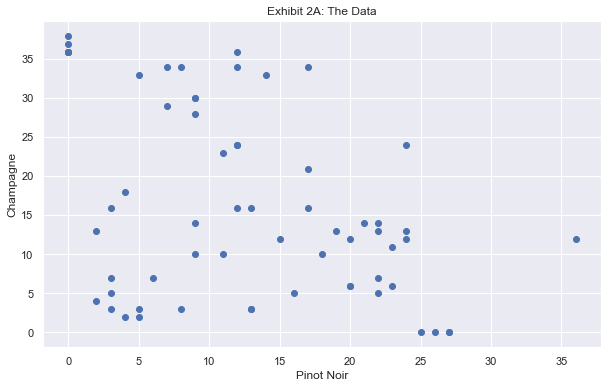

In [15]:
#plotting data
plt.figure(figsize = (10,6))
plt.scatter(wine_data['Pinot Noir'],wine_data['Champagne'])
plt.title("Exhibit 2A: The Data")
plt.xlabel("Pinot Noir")
plt.ylabel("Champagne")

In [16]:
import scipy.cluster.hierarchy as sch

In [20]:
X = wine_data.iloc[:,[1,2]].values


Text(0, 0.5, 'Euclidian Distance')

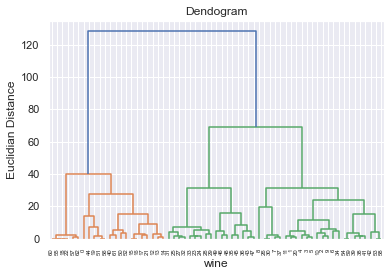

In [22]:
#Creating dendrogram
dendrogram = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title('Dendogram')
plt.xlabel("wine")
plt.ylabel("Euclidian Distance")

generating dataset


In [27]:
X,clusters = make_blobs(n_samples = 63, centers = 3,cluster_std = 0.50,random_state=0)

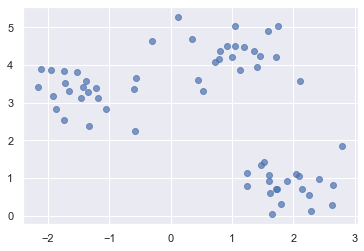

In [28]:
plt.scatter(X[:,0],X[:,1],alpha=0.7,edgecolors='b')

In [31]:
#initializing and training the model
brc = Birch(branching_factor = 50,n_clusters = 3,threshold = 1.5)
brc.fit(X)

Birch(threshold=1.5)

In [35]:
labels = brc.predict(X)
labels

array([2, 2, 0, 0, 2, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 2, 0, 2, 1, 0, 2, 2,
       1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0, 1,
       2, 2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 1],
      dtype=int64)

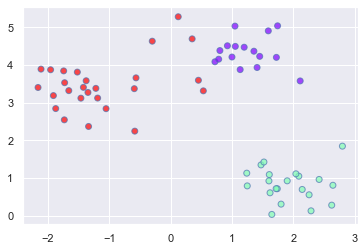

In [36]:
#plotting again but this time with a different color for each cluster
plt.scatter(X[:,0],X[:,1],c=labels,cmap='rainbow',alpha=0.7,edgecolors='b')

name          object
Pinot Noir     int64
Champagne      int64
dtype: object